In [24]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Descriptors import ExactMolWt
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from moses.metrics import mol_passes_filters, QED, SA, logP
from moses.metrics.utils import get_n_rings, get_mol


from utilities.config import Config

config = Config()

In [25]:
# read the molecules from LA and zinc files, c

# 读取LA的smiles分子式
LA_list = []
with open(config.LA_smiles_file, 'r', encoding='utf-8') as f:
    for line in f:
        LA_list.append(line.strip())

# 读取zinc的smiles分子式
zinc_list = []
with open(config.zinc_file, 'r', encoding='utf-8') as f:
    for line in f:
        zinc_list.append(line.strip().split(',')[0])
        
zinc_sampled_list = random.sample(zinc_list, 10*len(LA_list))


In [26]:
def get_num_rings_6(mol):
    r = mol.GetRingInfo()
    return len([x for x in r.AtomRings() if len(x) > 6])

def penalized_logP(mol_or_smiles, masked=False, default=-5):
    mol = get_mol(mol_or_smiles)
    if mol is None:
        return default
    reward = logP(mol) - SA(mol) - get_num_rings_6(mol)
    if masked and not mol_passes_filters(mol):
        return default
    return reward

In [27]:
LA_logP_list = []
LA_SA_list = []
LA_rings6_list = []
LA_penalized_logP = []

zinc_logP_list = []
zinc_SA_list = []
zinc_rings6_list = []
zinc_penalized_logP = []


for sm in LA_list:
    mol = get_mol(sm)
    if mol is not None:
        LA_logP_list.append(logP(mol))
        LA_SA_list.append(SA(mol))
        LA_rings6_list.append(get_num_rings_6(mol))
        LA_penalized_logP.append(logP(mol) - SA(mol) - get_num_rings_6(mol))
        
        
for sm in zinc_sampled_list:
    mol = get_mol(sm)
    if mol is not None:
        zinc_logP_list.append(logP(mol))
        zinc_SA_list.append(SA(mol))
        zinc_rings6_list.append(get_num_rings_6(mol))
        zinc_penalized_logP.append(logP(mol) - SA(mol) - get_num_rings_6(mol))

RDKit WARNING: [21:47:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:47:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [21:47:04] WARNING: not removing hydrogen atom without neighbors


(array([ 15.,  53., 116., 173.,  70.,  24.,   3.,   3.,   4.,   1.]),
 array([ 0.0721,  1.1217,  2.1713,  3.2209,  4.2705,  5.3201,  6.3697,
         7.4193,  8.4689,  9.5185, 10.5681]),
 <BarContainer object of 10 artists>)

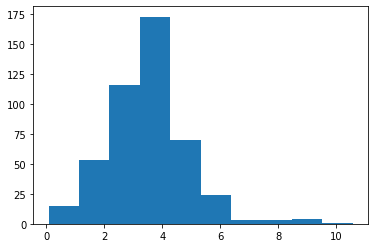

In [28]:
plt.hist(LA_logP_list)

(array([   7.,   37.,  109.,  282.,  615.,  994., 1322.,  987.,  244.,
          23.]),
 array([-1.46832 , -0.821462, -0.174604,  0.472254,  1.119112,  1.76597 ,
         2.412828,  3.059686,  3.706544,  4.353402,  5.00026 ]),
 <BarContainer object of 10 artists>)

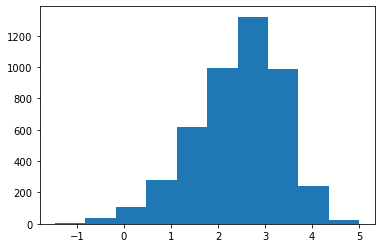

In [29]:
plt.hist(zinc_logP_list)

(array([ 32., 100., 227.,  47.,  13.,  19.,  10.,   5.,   7.,   2.]),
 array([1.29183732, 1.82953769, 2.36723805, 2.90493842, 3.44263878,
        3.98033915, 4.51803951, 5.05573988, 5.59344025, 6.13114061,
        6.66884098]),
 <BarContainer object of 10 artists>)

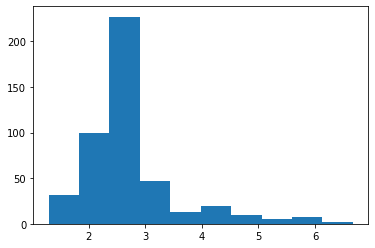

In [30]:
plt.hist(LA_SA_list)

(array([3.32e+02, 1.44e+03, 1.51e+03, 8.52e+02, 3.34e+02, 9.40e+01,
        3.70e+01, 1.80e+01, 1.00e+00, 2.00e+00]),
 array([1.50397687, 1.88102094, 2.25806502, 2.63510909, 3.01215316,
        3.38919724, 3.76624131, 4.14328539, 4.52032946, 4.89737354,
        5.27441761]),
 <BarContainer object of 10 artists>)

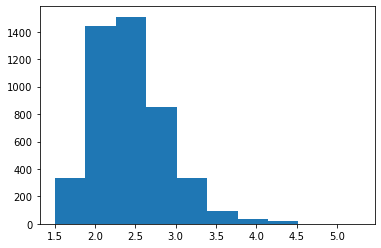

In [31]:
plt.hist(zinc_SA_list)

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  38.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

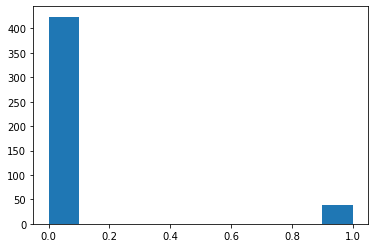

In [32]:
plt.hist(LA_rings6_list)

(array([4.508e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.090e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

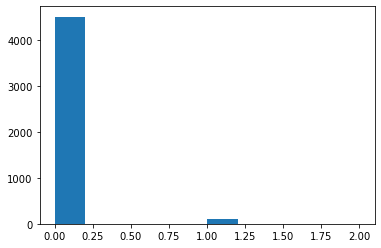

In [33]:
plt.hist(zinc_rings6_list)

(array([  7.,   6.,  16.,  44.,  89., 154., 108.,  31.,   2.,   5.]),
 array([-4.37273011, -3.41969556, -2.46666101, -1.51362646, -0.5605919 ,
         0.39244265,  1.3454772 ,  2.29851175,  3.2515463 ,  4.20458085,
         5.1576154 ]),
 <BarContainer object of 10 artists>)

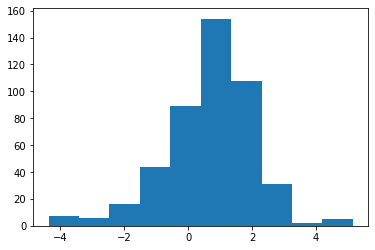

In [34]:
plt.hist(LA_penalized_logP)

(array([   3.,   14.,   36.,  146.,  372.,  807., 1234., 1292.,  638.,
          78.]),
 array([-5.42008443, -4.60769428, -3.79530413, -2.98291398, -2.17052383,
        -1.35813368, -0.54574353,  0.26664662,  1.07903677,  1.89142691,
         2.70381706]),
 <BarContainer object of 10 artists>)

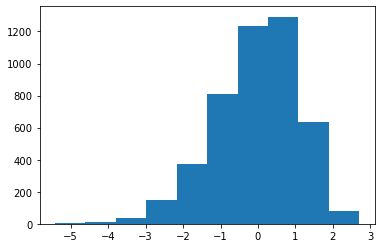

In [35]:
plt.hist(zinc_penalized_logP)